Importing modules

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

Reading the Dataset

In [ ]:
xls = pd.ExcelFile('dataset/online_retail_II.xlsx')
df1 = pd.read_excel(xls, 'Year 2009-2010')
df2 = pd.read_excel(xls, 'Year 2010-2011')

In [9]:
df=pd.concat([df1,df2])

In [14]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [15]:
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
df.size

8538968

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [18]:
df['InvoiceDate'].unique()

array(['2009-12-01T07:45:00.000000000', '2009-12-01T07:46:00.000000000',
       '2009-12-01T09:06:00.000000000', ...,
       '2011-12-09T12:31:00.000000000', '2011-12-09T12:49:00.000000000',
       '2011-12-09T12:50:00.000000000'], dtype='datetime64[ns]')

In [21]:

df['InvoiceDate'] = [d.date() for d in df['InvoiceDate']]

In [59]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],dayfirst=True)

In [22]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [23]:
df.dropna(inplace=True) 

In [24]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [25]:
df['Price'][df['Price']==0].value_counts()

0.0    71
Name: Price, dtype: int64

In [26]:
df.drop(df[df['Price']<=0].index,inplace=True)

In [27]:
df['Quantity'][df['Quantity']<=0]

178      -12
179       -6
180       -4
181       -6
182      -12
          ..
540449   -11
541541    -1
541715    -5
541716    -1
541717    -5
Name: Quantity, Length: 18742, dtype: int64

In [28]:
df.drop(df[df['Quantity']<=0].index,inplace=True)

removing invalid Stock Codes

In [29]:
rmv = ['POST','M','DOT','B','S','AMAZONFEE','BANK CHARGES','gift_0001_10','gift_0001_20','gift_0001_30','gift_0001_40','gift_0001_50']
for i in rmv:
    df.drop(df[df['StockCode']==i].index, inplace=True)

In [30]:
df.describe()

,Quantity,Price,Customer ID
count,787013.000000,787013.000000,787013.000000
mean,13.318185,2.952347,15338.408571
std,145.032566,4.505634,1693.994222
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13988.000000
50%,5.000000,1.950000,15278.000000
75%,12.000000,3.750000,16809.000000
max,80995.000000,649.500000,18287.000000


In [31]:
df['Quantity'][df.Quantity<100].count()

774138

## Creating a Revenue feature

In [32]:
df['Revenue']= df['Quantity'] * df['Price']

In [33]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0


revenue generated from each Customer

In [34]:
revenue = df['Revenue'].groupby(df['Customer ID']).sum().reset_index()
revenue.head()

,Customer ID,Revenue
0,12346.0,77556.46
1,12347.0,5438.72
2,12348.0,1658.40
3,12349.0,3630.81
4,12350.0,251.80


In [35]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Revenue        0
dtype: int64

## Calculating the Variety of products purchased by each Customer

In [50]:
# New Attribute : Frequency

products = df.groupby('Customer ID')['Invoice'].count()
products= products.reset_index()
products.columns = ['Customer ID', 'Tot_Trans']
products

,Customer ID,Tot_Trans
0,12346.0,34
1,12347.0,243
2,12348.0,46
3,12349.0,170
4,12350.0,14
...,...,...
5851,18283.0,955
5852,18284.0,28
5853,18285.0,12
5854,18286.0,66


In [51]:
tot_t = products.sort_values('Tot_Trans',ascending=False)
tot_t.head(10)

,Customer ID,Tot_Trans
5412,17841.0,12687
2525,14911.0,11060
399,12748.0,7038
2227,14606.0,6375
1724,14096.0,5023
2921,15311.0,4351
1782,14156.0,3978
2267,14646.0,3731
736,13089.0,3304
4143,16549.0,3194


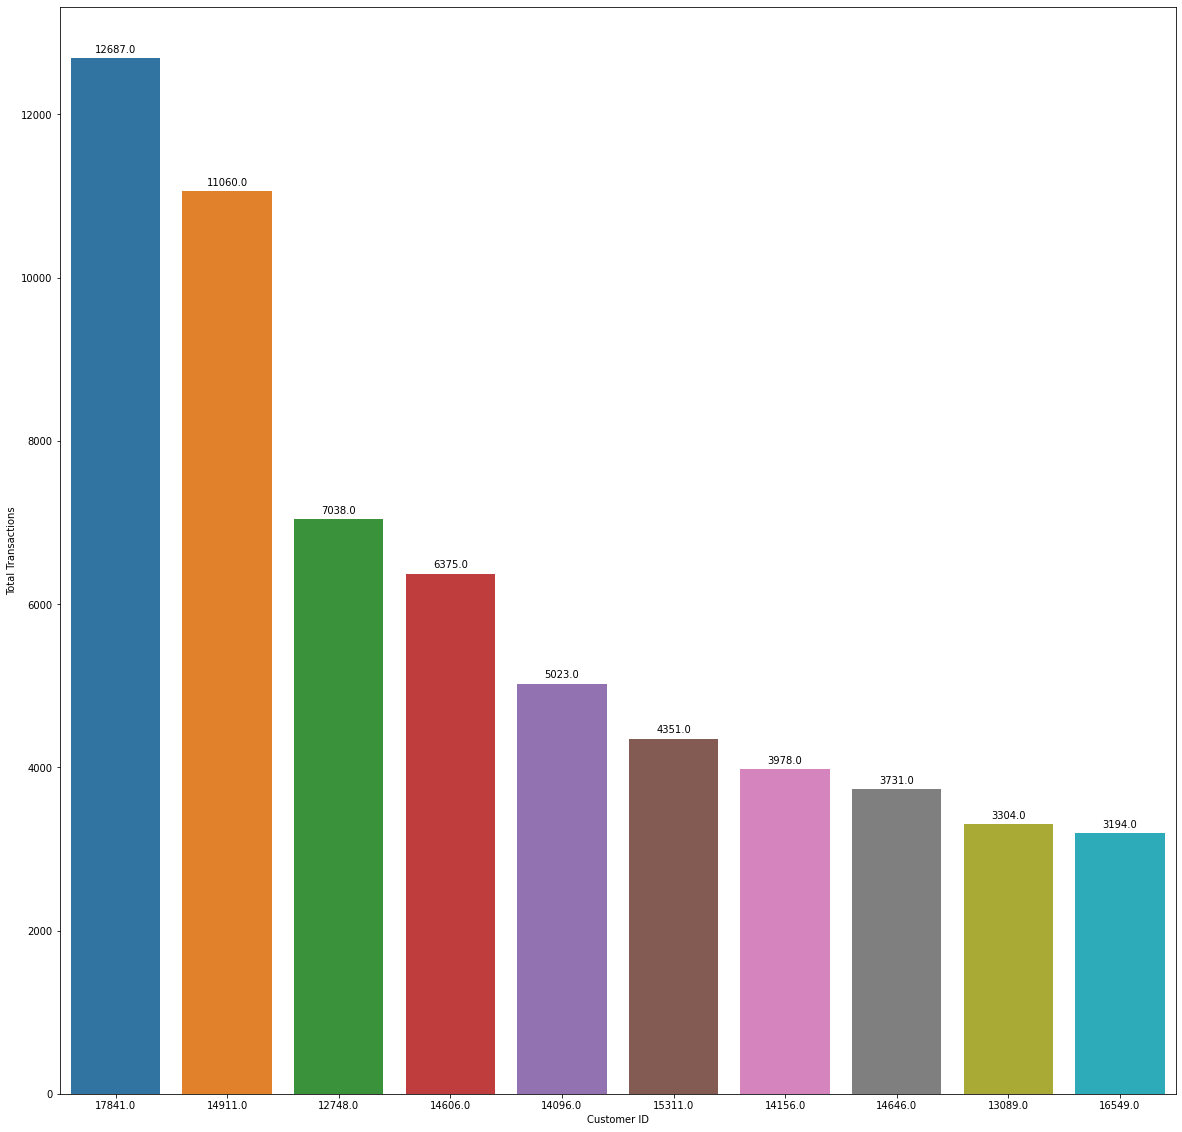

In [52]:
plt.figure(figsize=(20,20))
tt = sns.barplot(x='Customer ID', y='Tot_Trans', data=tot_t.head(10),order=tot_t.head(10).sort_values('Tot_Trans',ascending=False)['Customer ID'])
plt.ylabel('Total Transactions')

for p in tt.patches:
    tt.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

## Calculating the frequency of purchase per year

In [60]:
df['Invoice_Month'] = df['InvoiceDate'].dt.strftime('%B')
df['Invoice_Year'] = df['InvoiceDate'].dt.year

In [46]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Invoice_Month,Invoice_Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4,December,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,December,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0,December,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8,December,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0,December,2009


In [61]:
# Yearly Frequency

year_frequency = df.groupby('Invoice_Year')['Invoice'].count()
year_frequency = year_frequency.reset_index()
year_frequency.columns = ['Invoice_Year', 'Frequency']
year_frequency

,Invoice_Year,Frequency
0,2009,30058
1,2010,394022
2,2011,362933


## Calculating the frequency of purchase per month in a particular year

In [62]:
# Monthly Frequency - For the year 2010

monthly_frequency = df[df['Invoice_Year']==2009].groupby('Invoice_Month')['Invoice'].count()
monthly_frequency = monthly_frequency.reset_index()
monthly_frequency.columns = ['Month', 'Frequency']
monthly_frequency

,Month,Frequency
0,December,30058


In [65]:
monthly_frequency = df[df['Invoice_Year']==2010].groupby('Invoice_Month')['Invoice'].count()
monthly_frequency = monthly_frequency.reset_index()
monthly_frequency.columns = ['Month', 'Frequency']
mf = monthly_frequency.sort_values(by = 'Frequency',ascending = False)

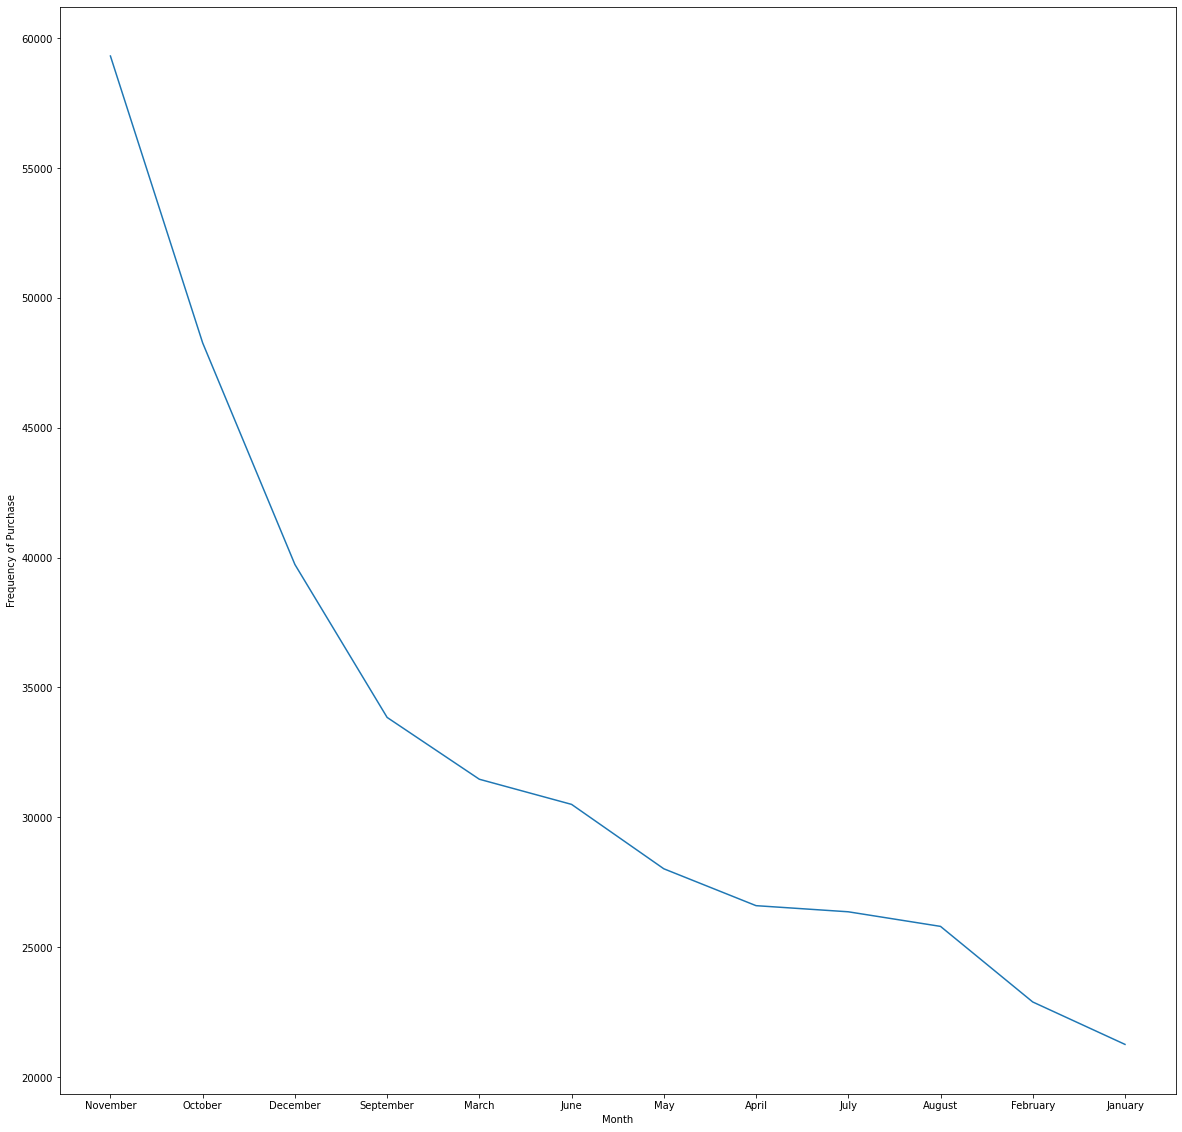

In [66]:
plt.figure(figsize=(20,20))
sns.lineplot(x='Month', y='Frequency',data=mf)
plt.ylabel('Frequency of Purchase')
plt.show()

## Total Quantity of purchase per customer

In [67]:
tot_quantity = df['Quantity'].groupby(df['Customer ID']).sum().reset_index()
tot_quantity.sort_values(by = 'Quantity')

,Customer ID,Quantity
1723,14095.0,1
223,12570.0,1
119,12466.0,1
208,12555.0,1
2651,15040.0,1
...,...,...
1782,14156.0,164326
1327,13694.0,183253
5670,18102.0,187197
1531,13902.0,212722


In [68]:
tot_quantity['Quantity'][tot_quantity.Quantity<100].count()

755

In [80]:
tot_q = tot_quantity.sort_values(by = 'Quantity',ascending=False)

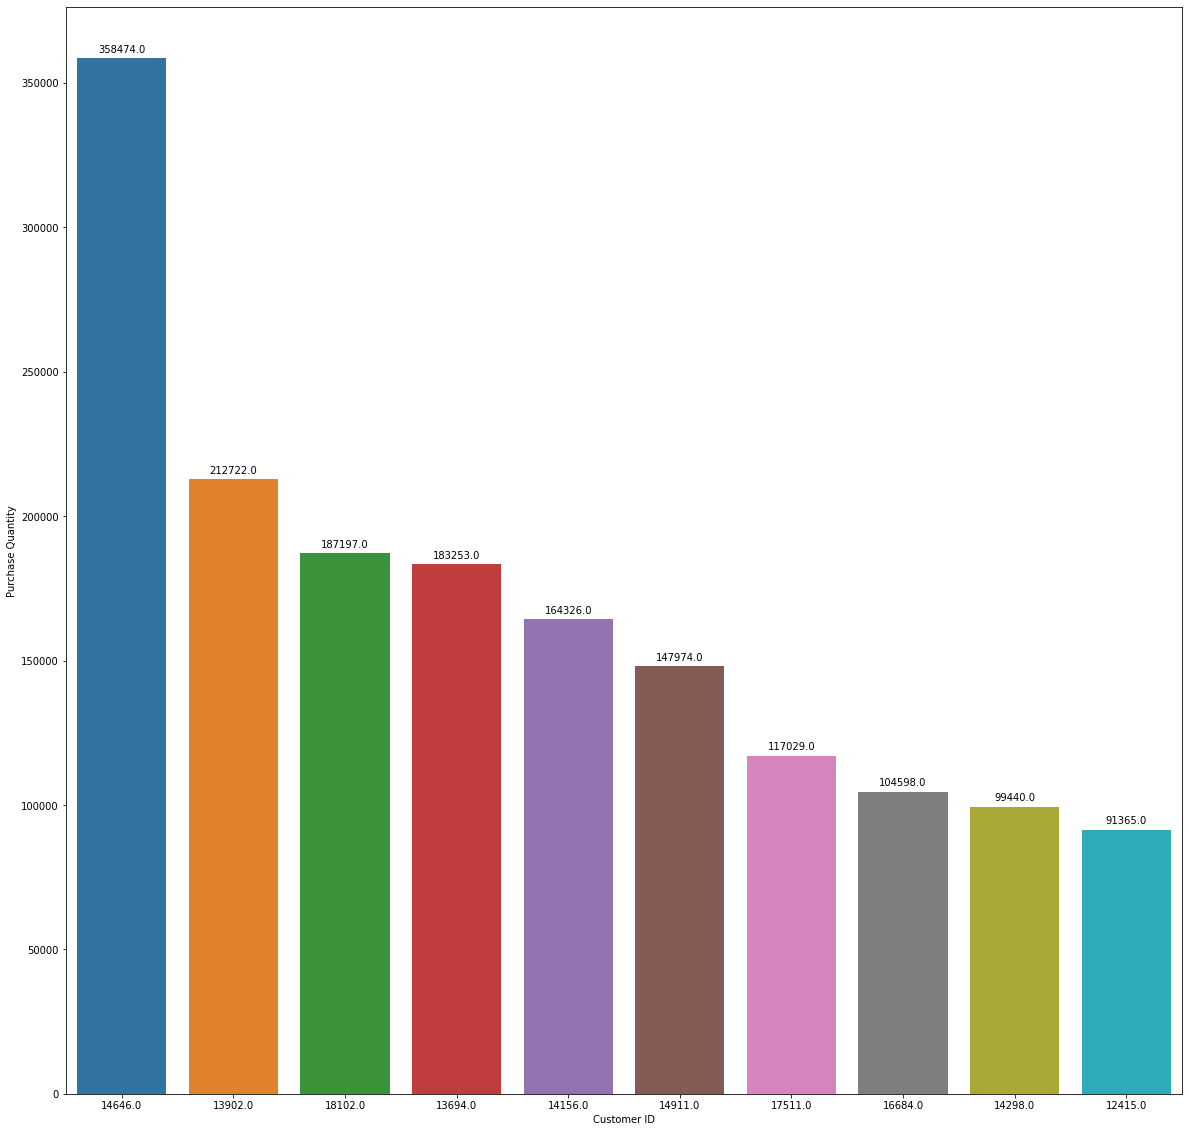

In [81]:
plt.figure(figsize=(20,20))
quan = sns.barplot(x = 'Customer ID',y='Quantity',data=tot_q.head(10),order=tot_q.head(10).sort_values('Quantity',ascending=False)['Customer ID'])
plt.ylabel('Purchase Quantity')

for p in quan.patches:
    quan.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Repeat Buyers

In [82]:

uniquedates = df.groupby('Customer ID')['InvoiceDate'].nunique()
uniquedates= uniquedates.reset_index()

uniquedates.columns = ['Customer ID', 'Retention']
uniquedates

,Customer ID,Retention
0,12346.0,8
1,12347.0,8
2,12348.0,5
3,12349.0,3
4,12350.0,1
...,...,...
5851,18283.0,19
5852,18284.0,1
5853,18285.0,1
5854,18286.0,2


In [83]:
uniquedates['Retention'].max()

250

In [84]:
ret = uniquedates.sort_values('Retention',ascending=False)
ret.head(10)

,Customer ID,Retention
2525,14911.0,250
399,12748.0,195
2921,15311.0,195
5412,17841.0,193
2227,14606.0,177
736,13089.0,130
2148,14527.0,121
1782,14156.0,117
619,12971.0,99
1429,13798.0,98


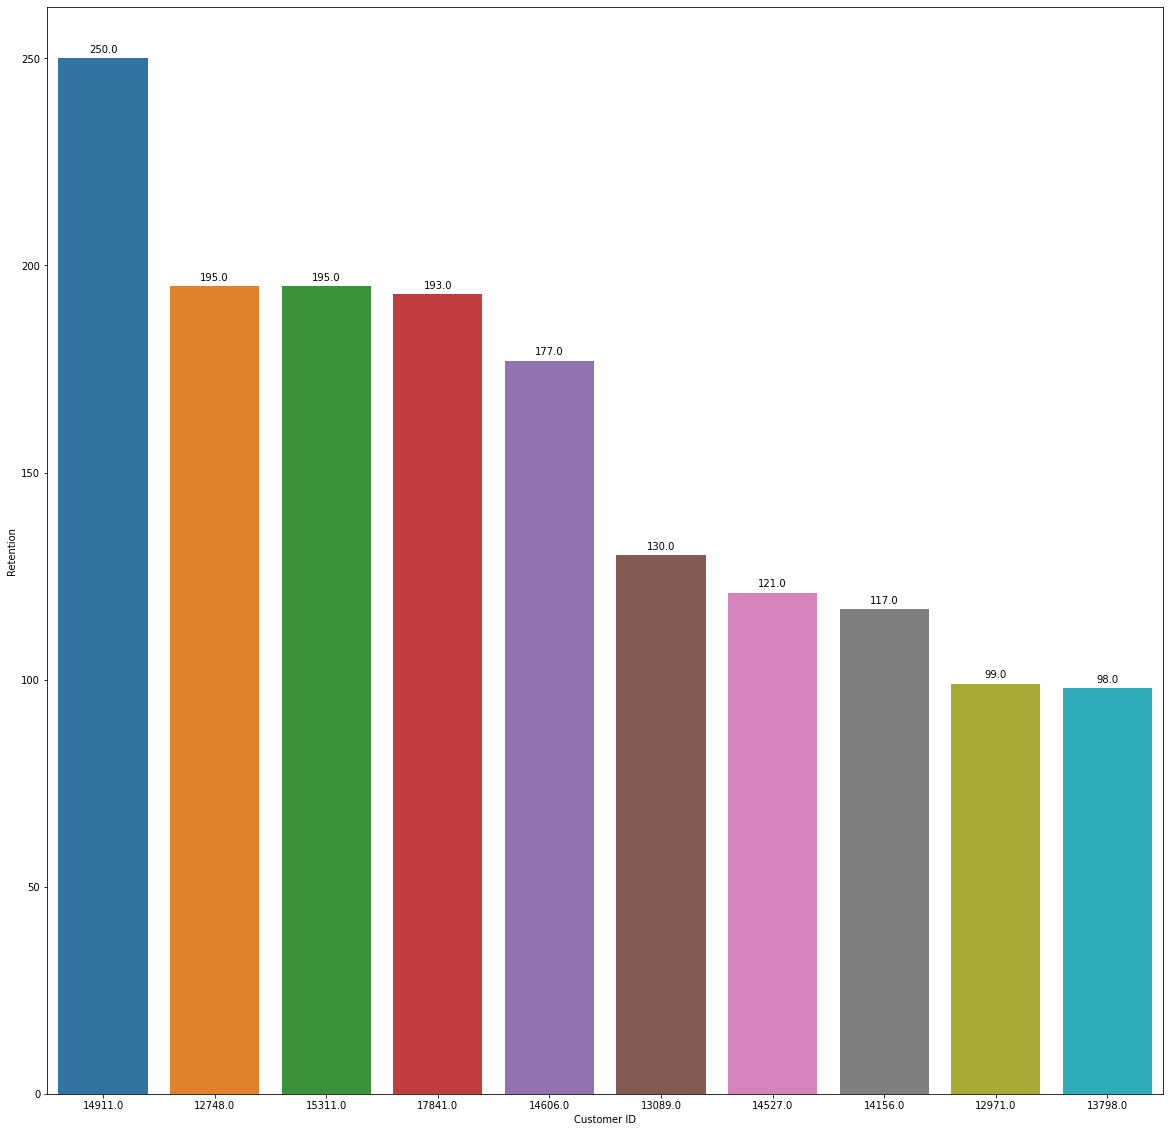

In [85]:
plt.figure(figsize=(20,20))
ret = sns.barplot(x='Customer ID', y='Retention', data=ret.head(10),order=ret.head(10).sort_values('Retention',ascending=False)['Customer ID'])


for p in ret.patches:
    ret.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Unique Products Purchased

In [86]:
prod_var = df.groupby('Customer ID')['StockCode'].nunique()
prod_var= prod_var.reset_index()
prod_var.columns = ['Customer ID', 'uniqueproducts']
prod_var

,Customer ID,uniqueproducts
0,12346.0,27
1,12347.0,125
2,12348.0,24
3,12349.0,137
4,12350.0,14
...,...,...
5851,18283.0,344
5852,18284.0,28
5853,18285.0,12
5854,18286.0,66


In [87]:
unq_pr = prod_var.sort_values('uniqueproducts',ascending=False)
unq_pr.head(10)

,Customer ID,uniqueproducts
2525,14911.0,2542
399,12748.0,2255
5412,17841.0,2111
1782,14156.0,1435
1923,14298.0,1361
2227,14606.0,1252
1724,14096.0,1116
2267,14646.0,952
2126,14505.0,883
1327,13694.0,875


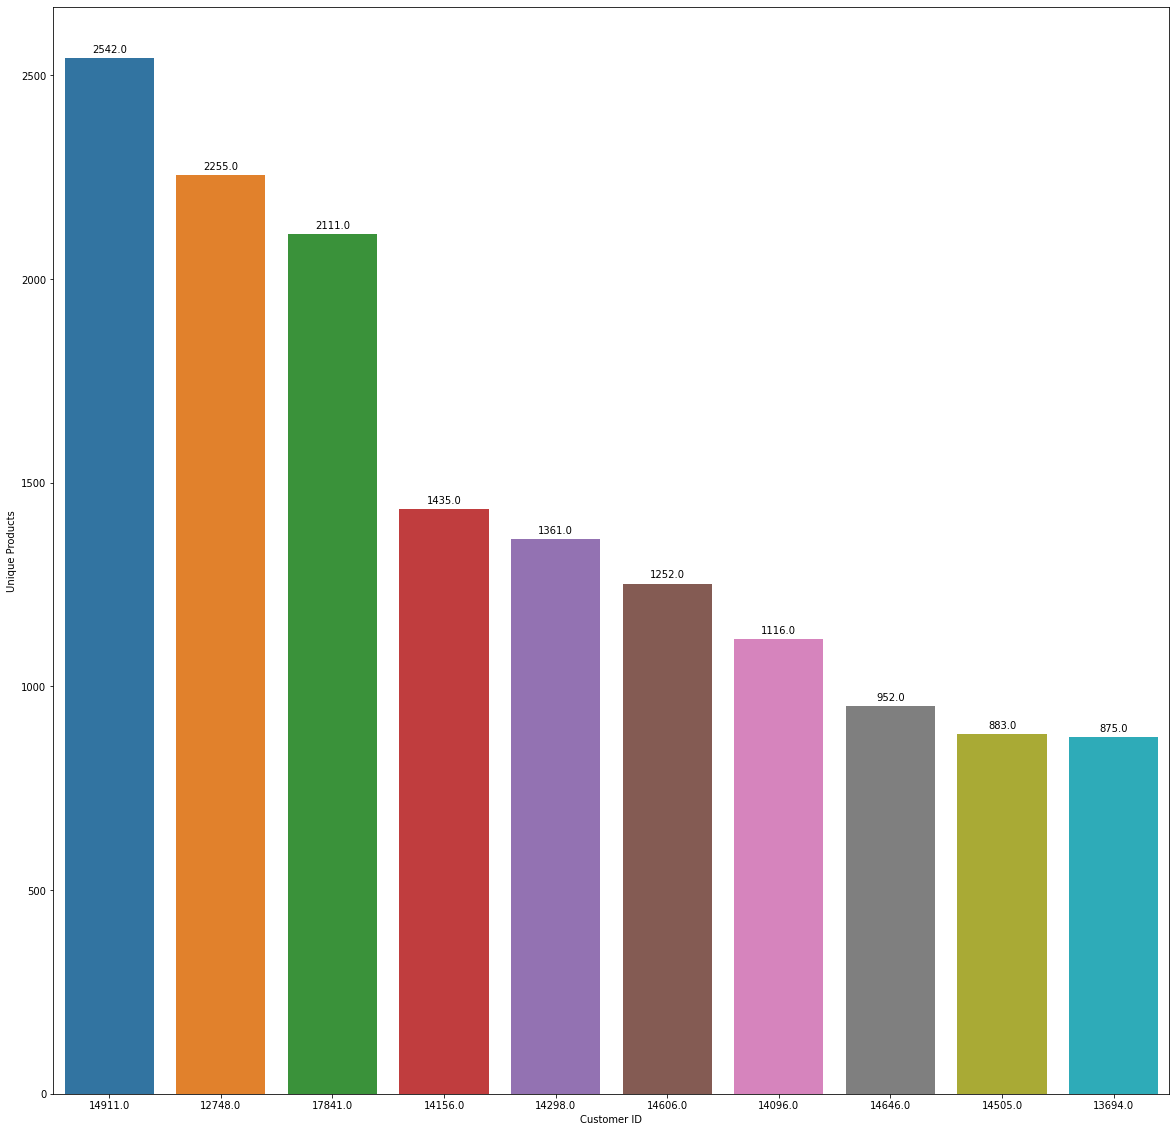

In [88]:
plt.figure(figsize=(20,20))
unip = sns.barplot(x='Customer ID', y='uniqueproducts', data=unq_pr.head(10),order=unq_pr.head(10).sort_values('uniqueproducts',ascending=False)['Customer ID'])
plt.ylabel('Unique Products')

for p in unip.patches:
    unip.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [89]:
loc = df['Country'].groupby(df['Customer ID'])


In [91]:

cdata= pd.merge(revenue,products, on='Customer ID', how='inner')
cdata.columns = ['Customer ID', 'Revenue', 'Tot_Trans']
cdata.head()
cdata2= pd.merge(tot_quantity,uniquedates, on='Customer ID', how='inner')
cdata2.head()
cdata3 = pd.merge(prod_var,cdata2,on='Customer ID')

csdata = pd.merge(cdata,cdata3,on = 'Customer ID',how = 'inner')

In [92]:
csdata1 = csdata.drop('Customer ID',axis=1)

In [94]:
correl_cs = csdata1.corr()
correl_cs

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
Revenue,1.000000,0.463592,0.402599,0.874216,0.547116
Tot_Trans,0.463592,1.000000,0.873418,0.436797,0.807857
uniqueproducts,0.402599,0.873418,1.000000,0.391808,0.706743
Quantity,0.874216,0.436797,0.391808,1.000000,0.512250
Retention,0.547116,0.807857,0.706743,0.512250,1.000000


<AxesSubplot:>

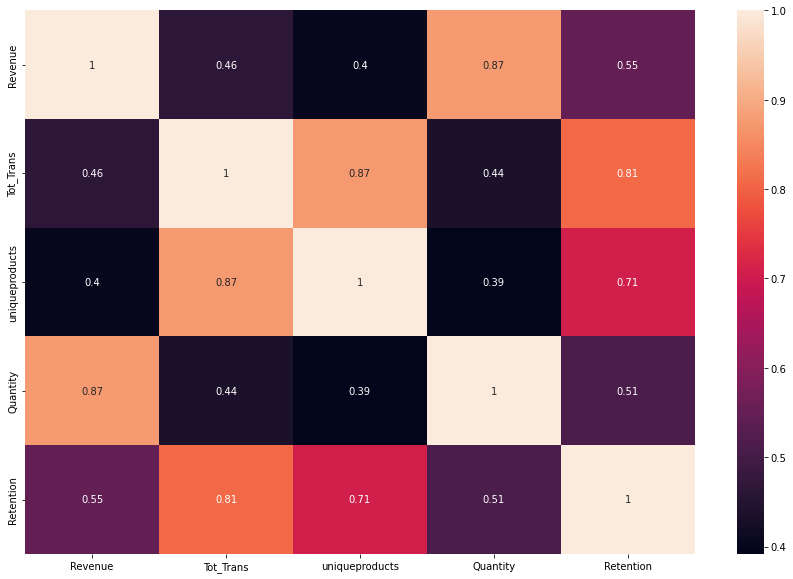

In [95]:
plt.figure(figsize=(15,10))
sns.heatmap(correl_cs,annot = True)

In [96]:
repeatpurchasers = 373/csdata.Retention
rr = repeatpurchasers.round()
Purchase_table = pd.DataFrame(rr.value_counts())

<AxesSubplot:xlabel='Retention', ylabel='Density'>

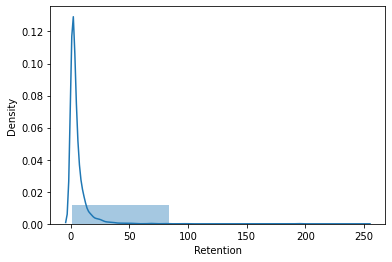

In [97]:
sns.distplot(csdata.Retention,bins = 3)

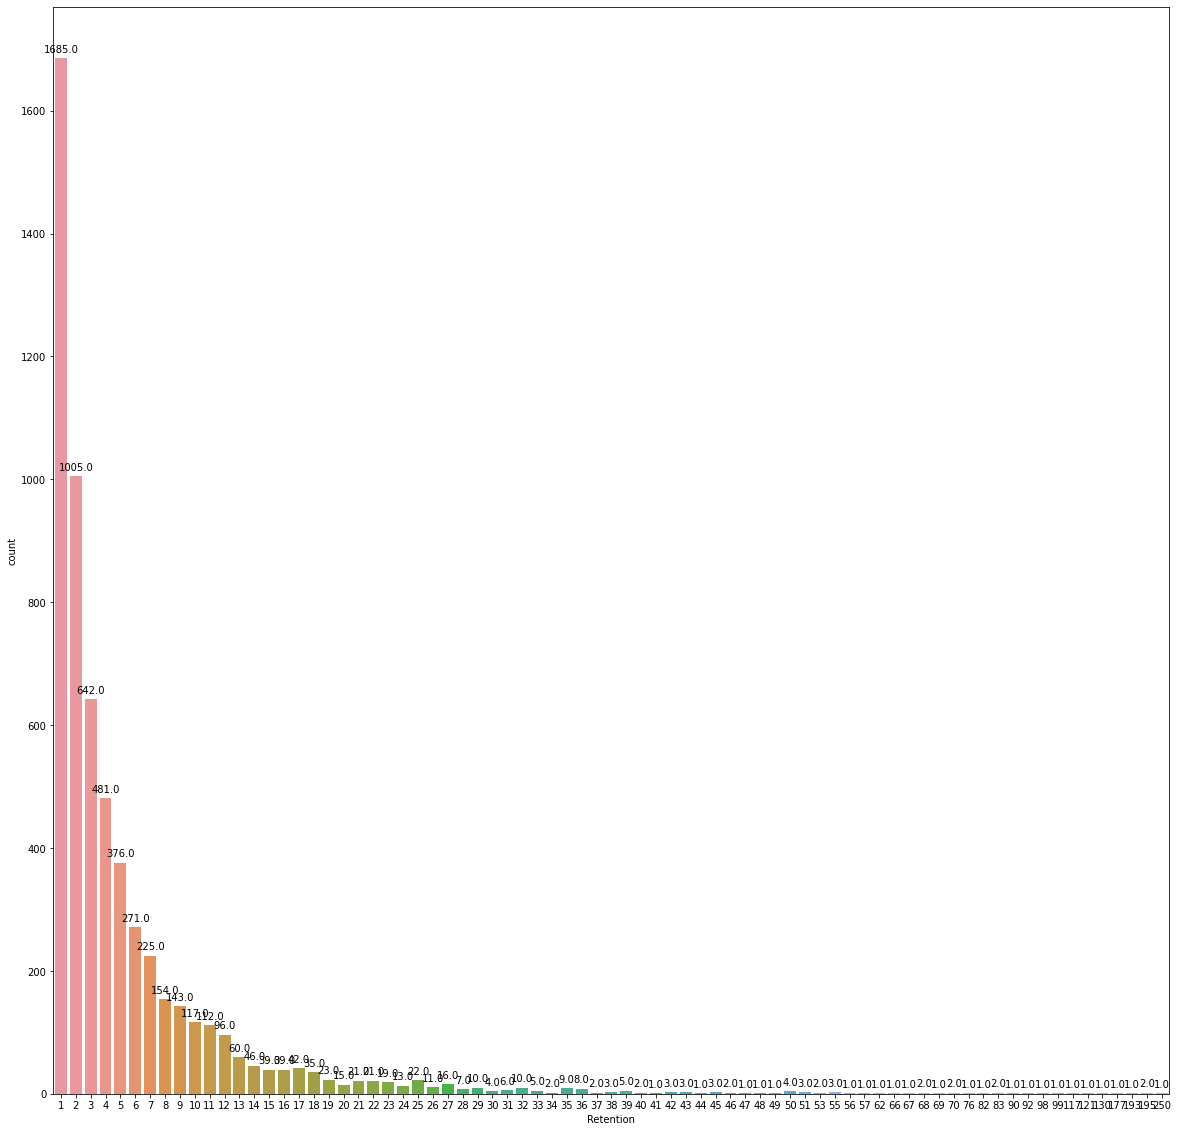

In [98]:
plt.figure(figsize=(20,20))
retn = sns.countplot(csdata.Retention)

for p in retn.patches:
    retn.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [101]:
csdata_clean = csdata.drop('Customer ID',axis = 1)
csdata_clean.head()

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,77556.46,34,27,74285,8
1,5438.72,243,125,3214,8
2,1658.40,46,24,2704,5
3,3630.81,170,137,1585,3
4,251.80,14,14,172,1


scaling the data

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
sc =StandardScaler()
csdatasc = sc.fit_transform(csdata1)
csc = pd.DataFrame(csdatasc)
csc.columns = csdata1.columns

# Clustering

## Iteration 1

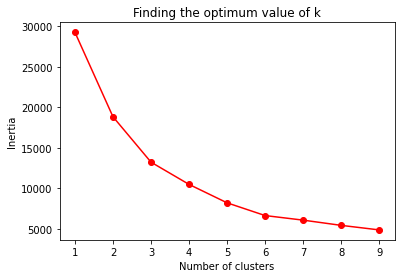

In [107]:
wcss = []
for k in range (1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(csc)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red',marker = 'o')
plt.title('Finding the optimum value of k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [108]:
mod = KMeans(n_clusters=3,n_init=12,random_state=22)
mod.fit(csc)

KMeans(n_clusters=3, n_init=12, random_state=22)

In [109]:
centroids=mod.cluster_centers_
centroid_df = pd.DataFrame(centroids,columns = list(csc))
columns = list(csc)
centroid_df.columns=csc.columns
centroid_df

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,-0.112527,-0.185287,-0.239002,-0.115385,-0.202962
1,0.647692,1.251801,1.755696,0.683817,1.417234
2,14.445812,13.949271,10.508637,13.768079,12.837289


In [111]:
from sklearn import metrics
metrics.silhouette_score(csc,mod.labels_)
csc_k = csc.copy()
csc_k['labels'] = mod.labels_

AGC

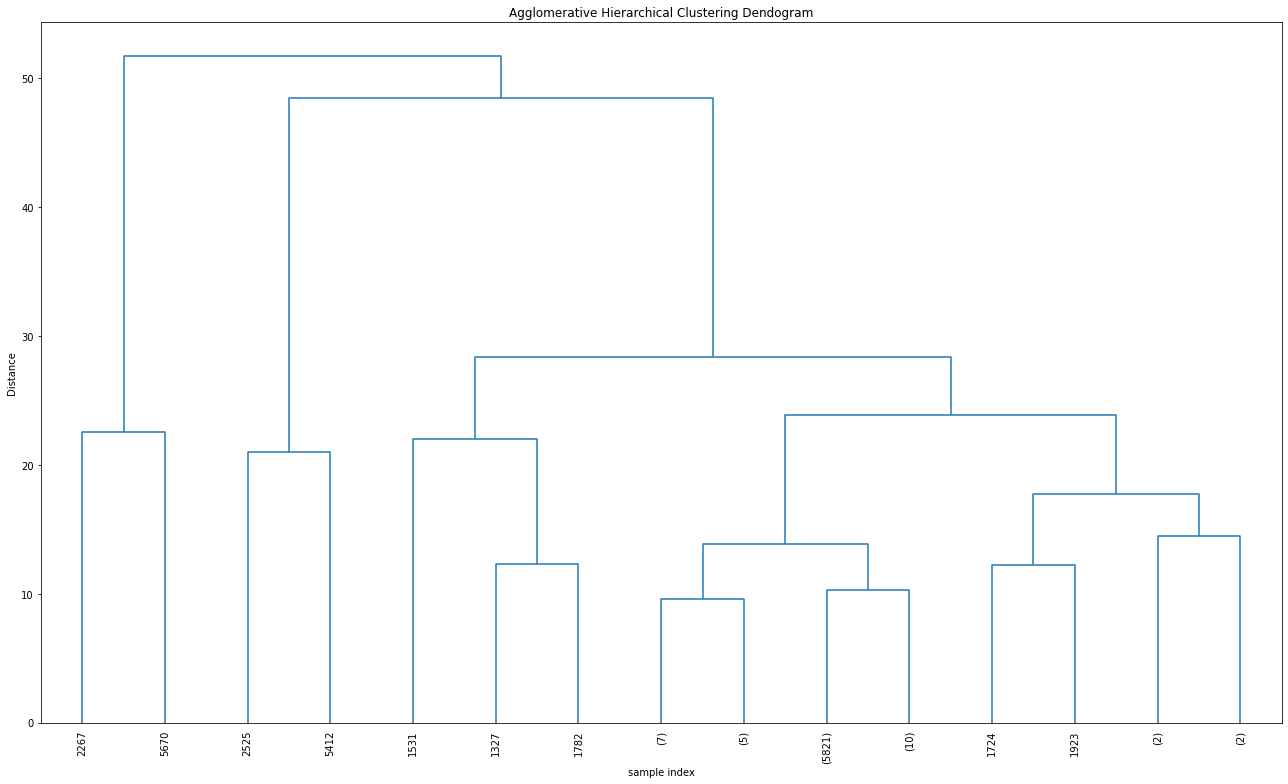

In [112]:
# Average Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(csc, 'average')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

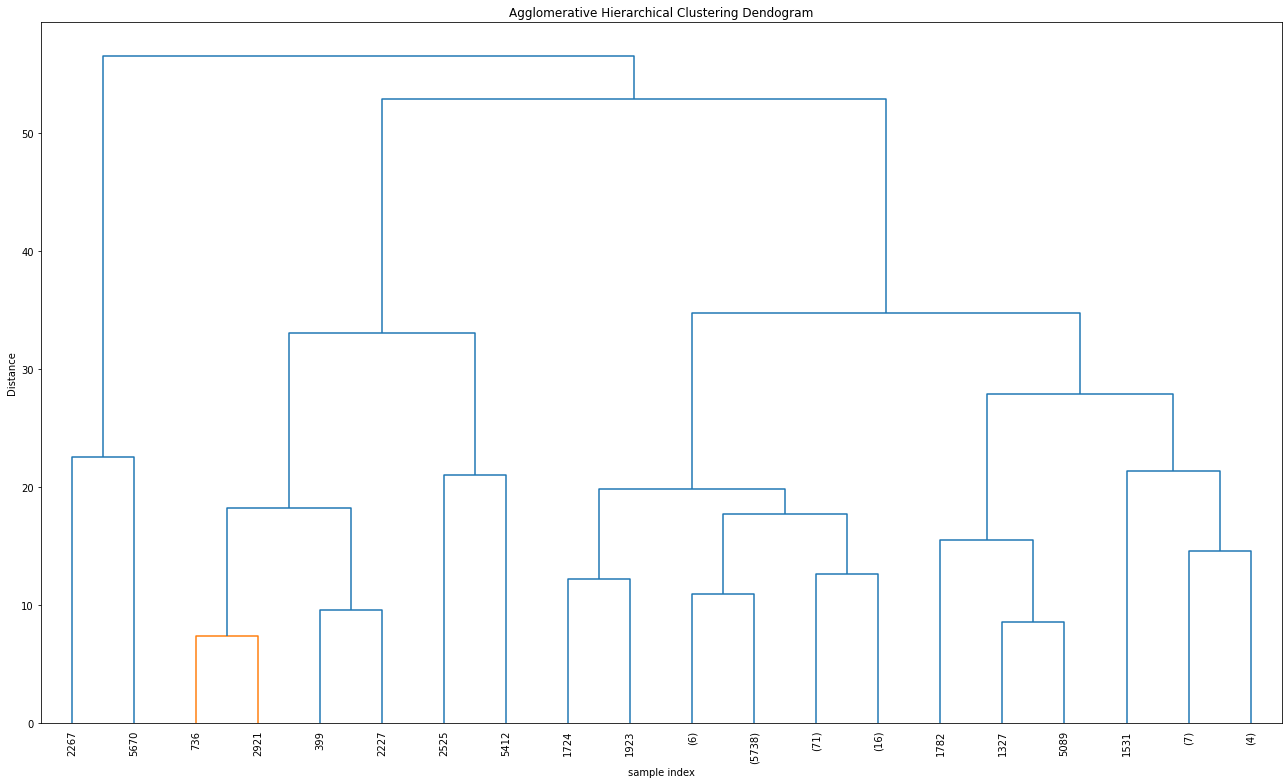

In [113]:
# Max Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(csc, 'complete')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

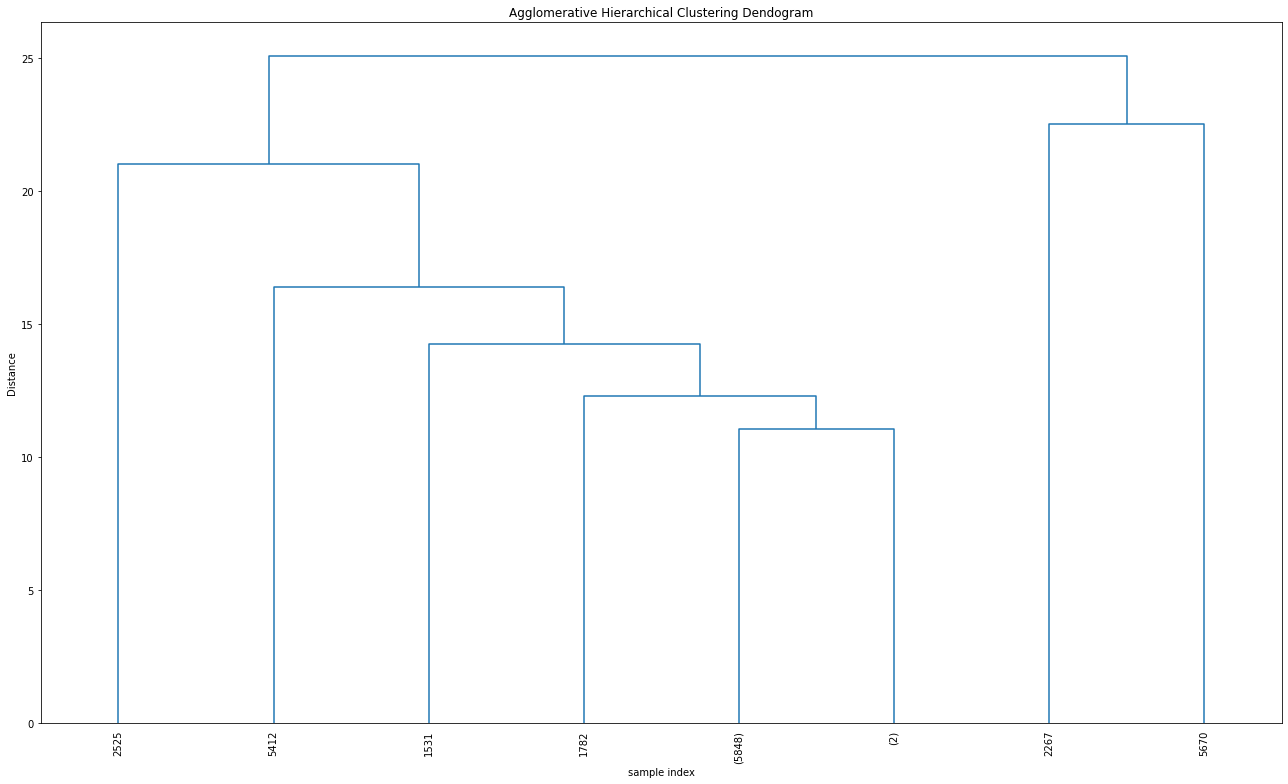

In [114]:
# Min Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(csc, 'single')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

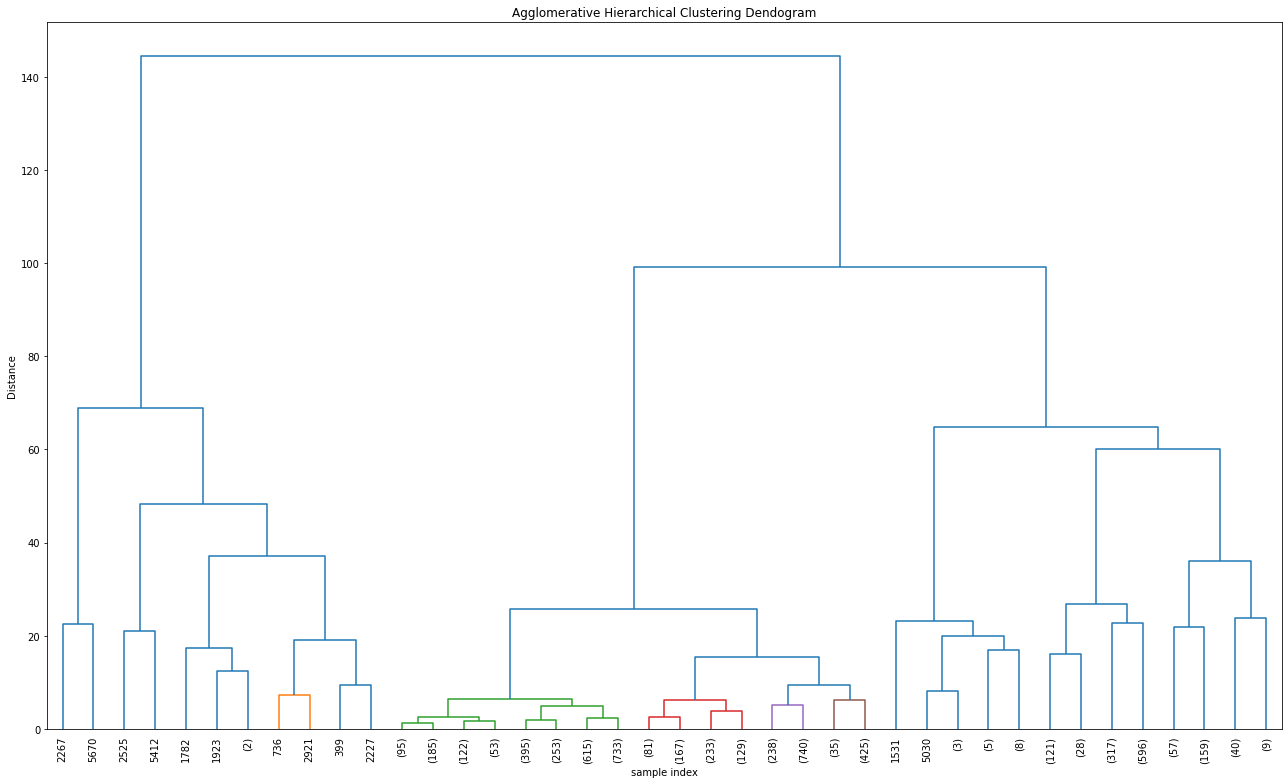

In [115]:
# Ward Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(csc, 'ward')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

In [116]:
from sklearn.cluster import AgglomerativeClustering 
modagc = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
modagc.fit(csc)
L=pd.DataFrame(modagc.labels_)
L[0].value_counts()
csc_a = csc.copy()
csc_a['labels']=modagc.labels_
agc_clusters = csc_a.copy()
agc_clusters_group = agc_clusters.groupby(['labels'])
df0 = agc_clusters_group.get_group(0)
df1 = agc_clusters_group.get_group(1)
df2 = agc_clusters_group.get_group(2)
c0 = np.array(df0.mean())
c1 = np.array(df1.mean())
c2 = np.array(df2.mean())
c0 = c0[:-1]
c1 = c1[:-1]
c2 = c2[:-1]
agc_I0 = 0
agc_I1 = 0
agc_I2 = 0

for i in np.arange(df0.shape[0]):
    agc_I0 = agc_I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
    agc_I1 = agc_I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):
    agc_I2 = agc_I2+np.sum((df2.iloc[i,:-1]-c2)**2)  
    
print("Inertia of AGC:",agc_I0+agc_I1+agc_I2)

Inertia of AGC: 13927.555543472023


In [118]:
csdata1 = csdata.copy()
csdata1['labels'] = mod.labels_
csdata_high = csdata1[csdata1['labels']==1]
csdata_sub = csdata1[csdata1['labels']!=1]
csdata_sub.drop('labels',axis=1,inplace=True)

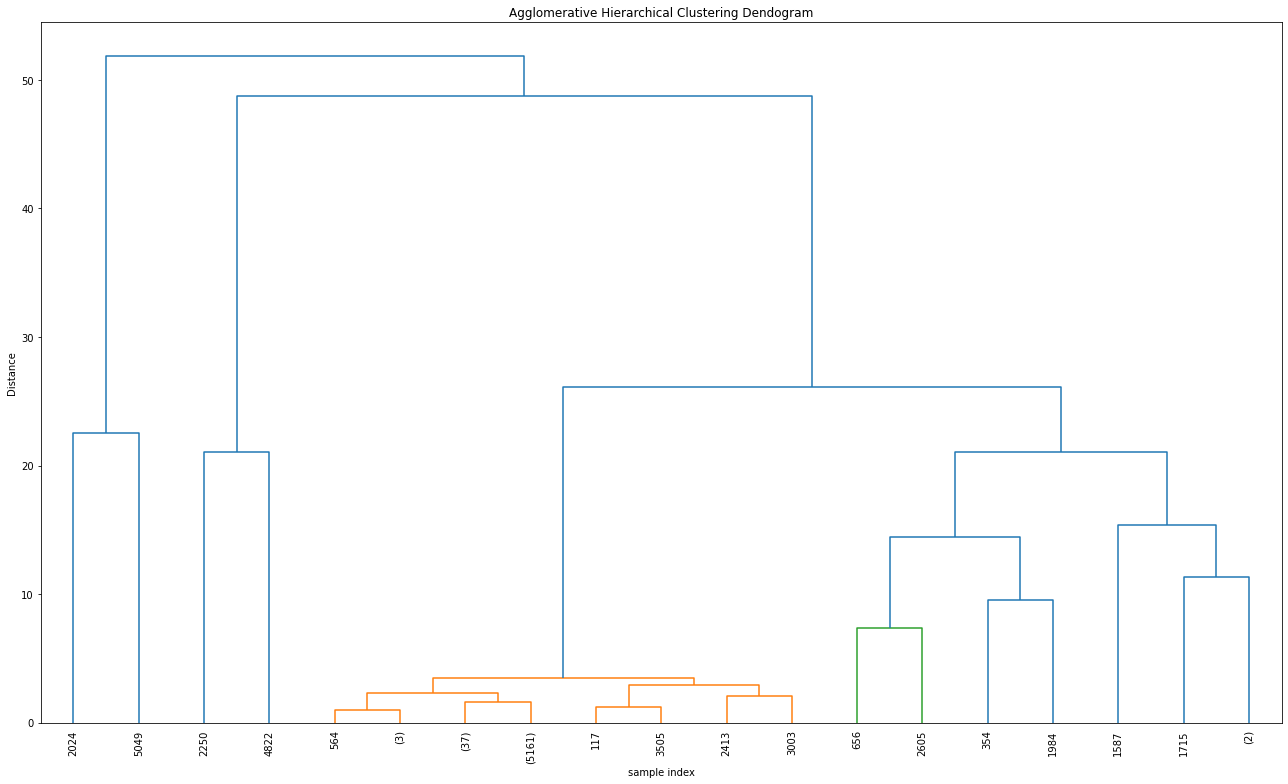

In [119]:
subd1 = csc_k[csc_k.labels != 1]
subd1
subd11 = subd1.drop('labels',axis=1)
subd11

# Average Linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(subd11, 'average')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

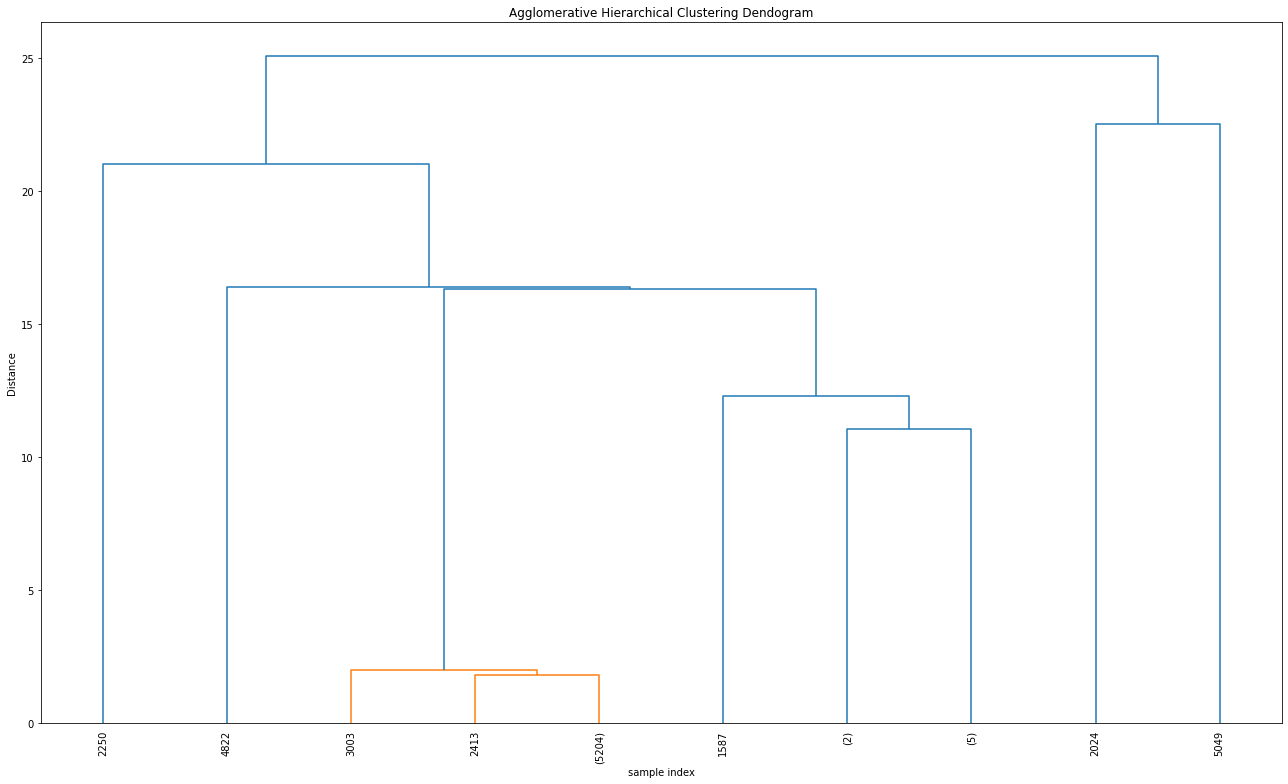

In [120]:
# Min Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(subd11, 'single')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

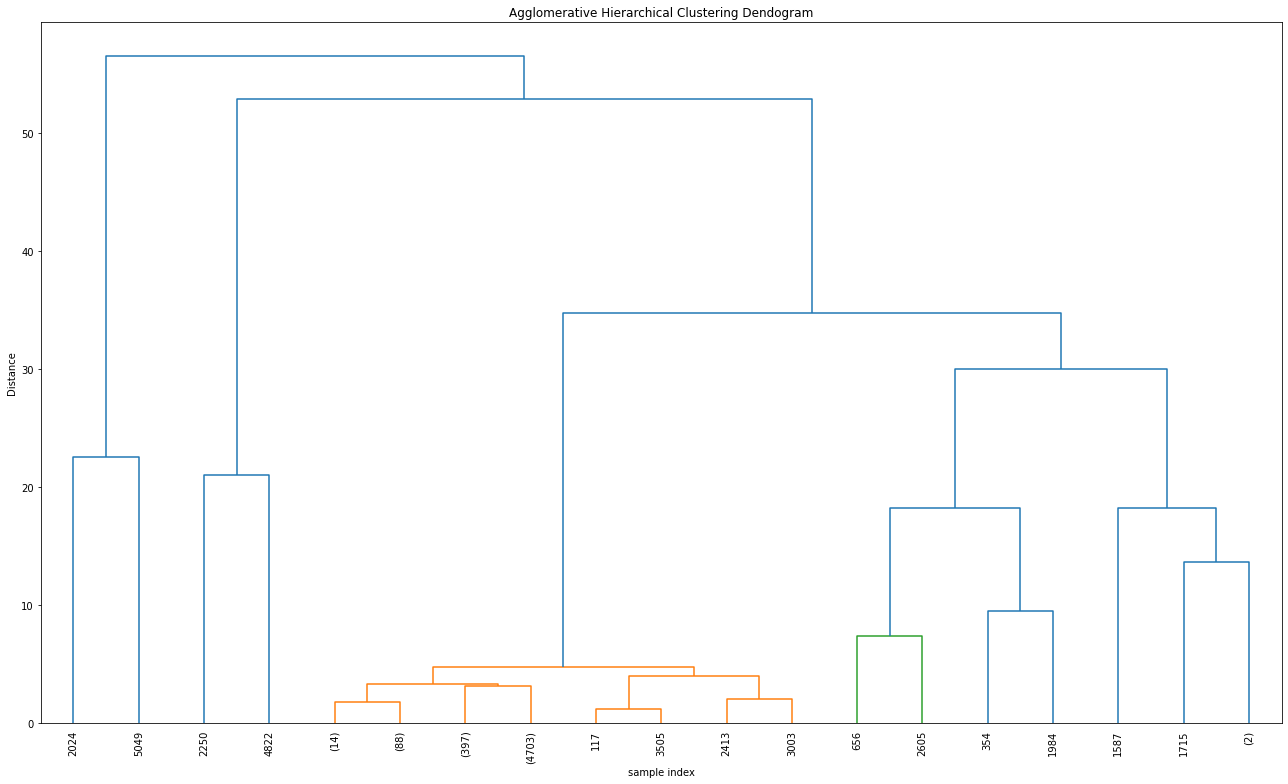

In [121]:
# Max Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(subd11, 'complete')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

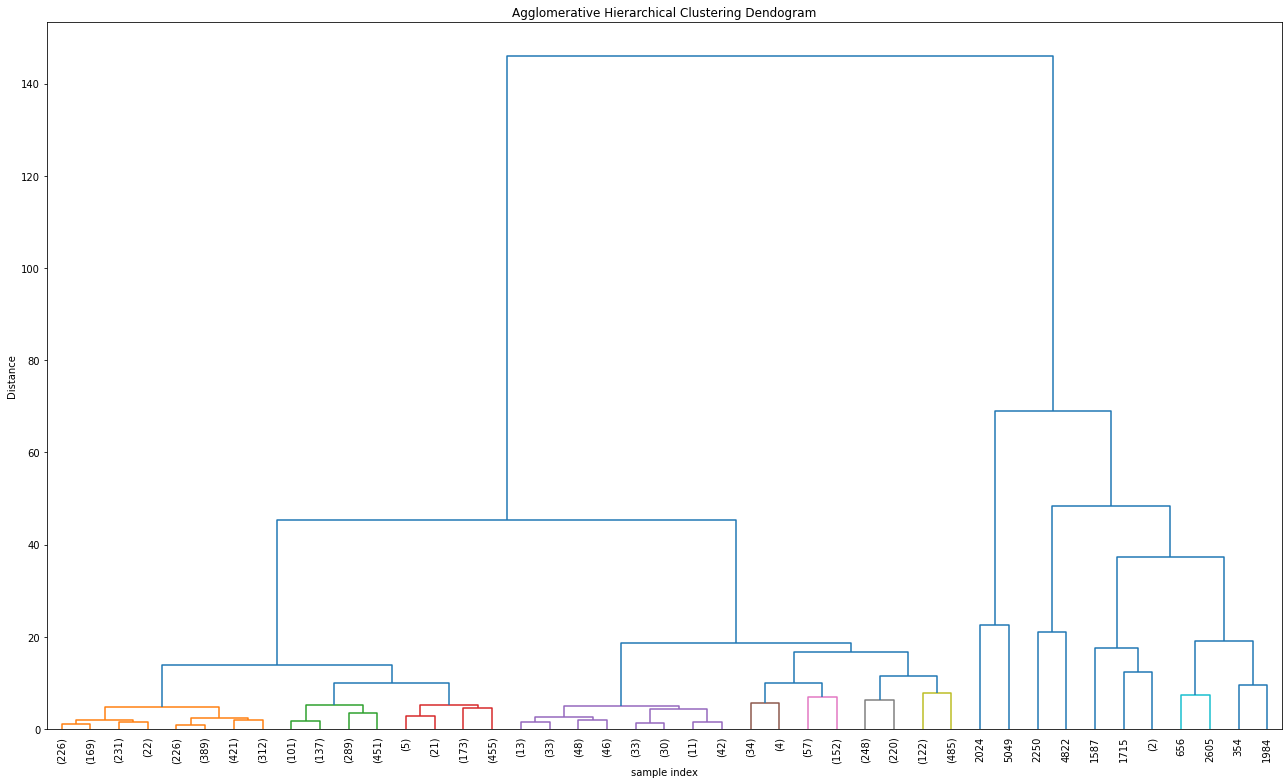

In [122]:
# Ward Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(subd11, 'ward')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

In [123]:
modsub1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='ward')
modsub1.fit(subd11)
M=pd.DataFrame(modsub1.labels_)
M[0].value_counts()
subd11_agc = subd11.copy()
subd11_agc['labels'] = modsub1.labels_
subd11_agc['labels'].value_counts()
agc_clusters2 = subd11_agc.copy()
agc_clusters_group = agc_clusters2.groupby(['labels'])
df0 = agc_clusters_group.get_group(0)
df1 = agc_clusters_group.get_group(1)
df2 = agc_clusters_group.get_group(2)
df3 = agc_clusters_group.get_group(3)

c0 = np.array(df0.mean())
c1 = np.array(df1.mean())
c2 = np.array(df2.mean())
c3 = np.array(df3.mean())
c0 = c0[:-1]
c1 = c1[:-1]
c2 = c2[:-1]
c3 = c3[:-1]

agc_I0 = 0
agc_I1 = 0
agc_I2 = 0
agc_I3 = 0

for i in np.arange(df0.shape[0]):
    agc_I0 = agc_I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
    agc_I1 = agc_I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):
    agc_I2 = agc_I2+np.sum((df2.iloc[i,:-1]-c2)**2)
for i in np.arange(df3.shape[0]):
    agc_I3 = agc_I3+np.sum((df3.iloc[i,:-1]-c3)**2)   

print("Inertia of AGC:",agc_I0+agc_I1+agc_I2+agc_I3)

Inertia of AGC: 3648.7833868342886


K-mean

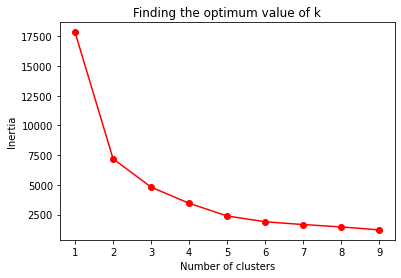

In [124]:
wcss = []

for k in range (1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(subd11)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red',marker = 'o')
plt.title('Finding the optimum value of k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [126]:
skmod1 = KMeans(n_clusters=4,n_init=12,random_state=22)
skmod1.fit(subd11)
centroids=skmod1.cluster_centers_
centroid_df = pd.DataFrame(centroids,columns = list(subd11))
columns = list(subd11)
centroid_df.columns=subd11.columns 
centroid_df
subd11_k = subd11.copy()
subd11_k['labels'] = skmod1.labels_

In [127]:
subd11_k[subd11_k.labels==0]


,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
1,0.174539,0.312745,0.381388,0.161781,0.242139,0
2,-0.087674,-0.254544,-0.494030,0.103844,-0.060953,0
3,0.049138,0.102532,0.485398,-0.023276,-0.263014,0
4,-0.185239,-0.346692,-0.580705,-0.183794,-0.465076,0
5,-0.181831,-0.326535,-0.520032,-0.173684,-0.465076,0
...,...,...,...,...,...,...
5850,-0.190354,-0.352451,-0.598040,-0.191633,-0.364045,0
5852,-0.170681,-0.306377,-0.459360,-0.147215,-0.465076,0
5853,-0.173087,-0.352451,-0.598040,-0.186862,-0.465076,0
5854,-0.114161,-0.196951,-0.129995,-0.134491,-0.364045,0


In [128]:
subd11_k[subd11_k.labels==1]

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
2267,35.507120,10.356923,7.549409,40.519821,8.526649,1
5670,41.753025,2.636613,2.600267,21.062511,6.202945,1


In [129]:
subd11_k[subd11_k.labels==2]

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
399,3.297735,19.879886,18.843159,4.016277,19.134864,2
2227,1.864493,17.970686,10.149658,1.538062,17.316313,2
2525,19.265216,31.461791,21.330731,16.606723,24.691548,2
2921,7.771343,12.142299,6.725996,7.721842,19.134864,2
5412,4.644954,36.146962,17.595039,3.988899,18.932803,2


In [130]:
subd11_k[subd11_k.labels==3]

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
736,7.738429,9.127317,6.708661,6.499491,12.567874,3
1327,13.060727,3.854700,6.882011,20.614467,7.718404,3
1782,20.718874,11.068194,11.735811,18.464333,11.254476,3
1923,6.063461,7.776767,11.094416,11.093191,3.980272,3
5089,11.664370,4.969120,4.888487,13.091327,4.586455,3


In [131]:
silhoutte_k2 = silhouette_score(subd11, subd11_k['labels'])
silhoutte_k2

0.969865461782917

In [132]:
csdata_sub

,Customer ID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
1,12347.0,5438.72,243,125,3214,8
2,12348.0,1658.40,46,24,2704,5
3,12349.0,3630.81,170,137,1585,3
4,12350.0,251.80,14,14,172,1
5,12351.0,300.93,21,21,261,1
...,...,...,...,...,...,...
5850,18282.0,178.05,12,12,103,2
5852,18284.0,461.68,28,28,494,1
5853,18285.0,427.00,12,12,145,1
5854,18286.0,1276.53,66,66,606,2


In [133]:
subd11_k

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
1,0.174539,0.312745,0.381388,0.161781,0.242139,0
2,-0.087674,-0.254544,-0.494030,0.103844,-0.060953,0
3,0.049138,0.102532,0.485398,-0.023276,-0.263014,0
4,-0.185239,-0.346692,-0.580705,-0.183794,-0.465076,0
5,-0.181831,-0.326535,-0.520032,-0.173684,-0.465076,0
...,...,...,...,...,...,...
5850,-0.190354,-0.352451,-0.598040,-0.191633,-0.364045,0
5852,-0.170681,-0.306377,-0.459360,-0.147215,-0.465076,0
5853,-0.173087,-0.352451,-0.598040,-0.186862,-0.465076,0
5854,-0.114161,-0.196951,-0.129995,-0.134491,-0.364045,0


In [135]:
csdata_sub['labels'] = skmod1.labels_
csdata_sub

,Customer ID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
1,12347.0,5438.72,243,125,3214,8,0
2,12348.0,1658.40,46,24,2704,5,0
3,12349.0,3630.81,170,137,1585,3,0
4,12350.0,251.80,14,14,172,1,0
5,12351.0,300.93,21,21,261,1,0
...,...,...,...,...,...,...,...
5850,18282.0,178.05,12,12,103,2,0
5852,18284.0,461.68,28,28,494,1,0
5853,18285.0,427.00,12,12,145,1,0
5854,18286.0,1276.53,66,66,606,2,0


In [136]:
csdata_high

,Customer ID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
0,12346.0,77556.46,34,27,74285,8,1
11,12357.0,17437.66,295,260,6586,2,1
13,12359.0,8813.39,358,299,2715,10,1
32,12378.0,5318.72,296,276,3284,2,1
62,12409.0,23119.19,258,175,12925,7,1
...,...,...,...,...,...,...,...
5813,18245.0,6091.76,443,326,4956,15,1
5819,18251.0,25785.38,104,83,38531,8,1
5825,18257.0,4535.01,271,216,2342,11,1
5828,18260.0,9932.41,410,212,5241,22,1


In [138]:
csdata_highf = csdata_high.replace({'labels':{1:4}})
csdata_highf

,Customer ID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
0,12346.0,77556.46,34,27,74285,8,4
11,12357.0,17437.66,295,260,6586,2,4
13,12359.0,8813.39,358,299,2715,10,4
32,12378.0,5318.72,296,276,3284,2,4
62,12409.0,23119.19,258,175,12925,7,4
...,...,...,...,...,...,...,...
5813,18245.0,6091.76,443,326,4956,15,4
5819,18251.0,25785.38,104,83,38531,8,4
5825,18257.0,4535.01,271,216,2342,11,4
5828,18260.0,9932.41,410,212,5241,22,4


Class 1 Customers - Customers with low frequency of purchase and low revenue.

In [139]:
csdata_final = pd.concat([csdata_highf,csdata_sub])


class 0


In [140]:
a1 = csdata_final[csdata_final['labels']==0]
print(a1)

      Customer ID  Revenue  Tot_Trans  uniqueproducts  Quantity  Retention  \
1         12347.0  5438.72        243             125      3214          8   
2         12348.0  1658.40         46              24      2704          5   
3         12349.0  3630.81        170             137      1585          3   
4         12350.0   251.80         14              14       172          1   
5         12351.0   300.93         21              21       261          1   
...           ...      ...        ...             ...       ...        ...   
5850      18282.0   178.05         12              12       103          2   
5852      18284.0   461.68         28              28       494          1   
5853      18285.0   427.00         12              12       145          1   
5854      18286.0  1276.53         66              66       606          2   
5855      18287.0  4182.99        155             120      3013          6   

      labels  
1          0  
2          0  
3          0  
4  

In [141]:
csdata_f0 = csdata_final[csdata_final['labels']==0]
csdata_f0['Retention'].mean()
csdata_final0 = csdata_f0.drop(['Customer ID','labels'],axis=1)

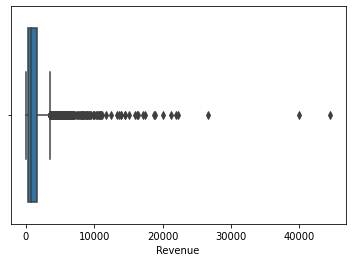

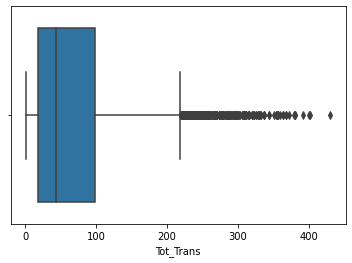

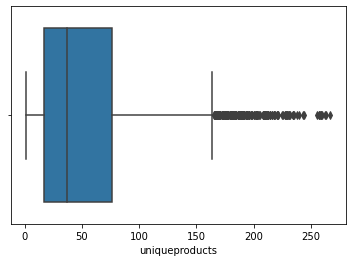

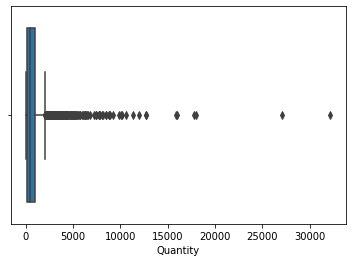

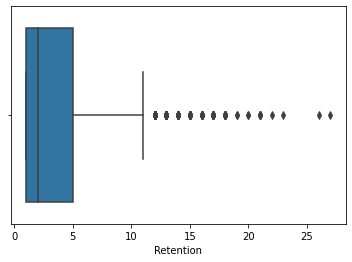

In [142]:
for i in csdata_final0.columns:
    sns.boxplot(csdata_final0[i])
    plt.show()

class 1

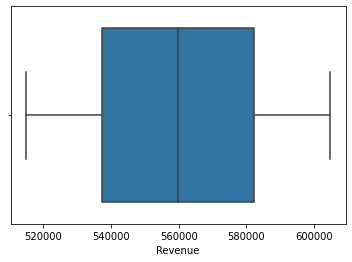

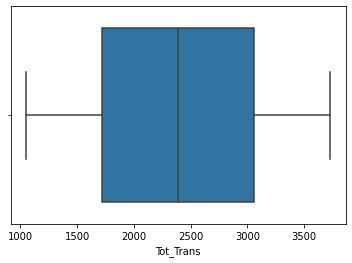

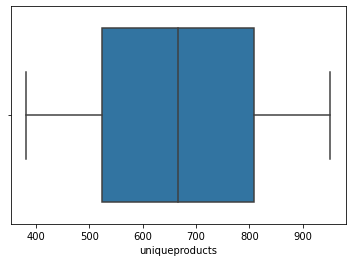

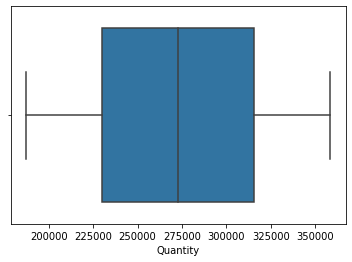

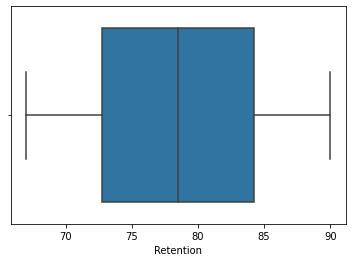

In [143]:
a2 = csdata_final[csdata_final['labels']==1]
csdata_f1 = csdata_final[csdata_final['labels']==1]
csdata_f1.describe()
csdata_f1['Retention'].mean()
csdata_final1 = csdata_f1.drop(['Customer ID','labels'],axis=1)
for i in csdata_final1.columns:
    sns.boxplot(csdata_final1[i])
    plt.show()

class 2

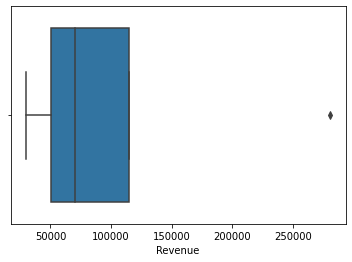

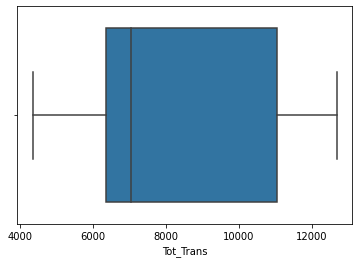

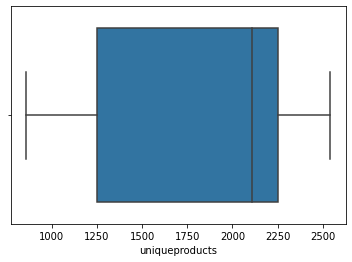

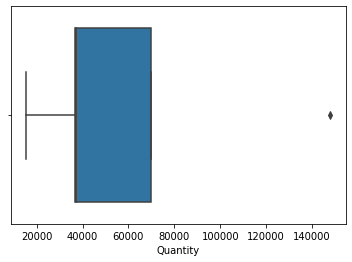

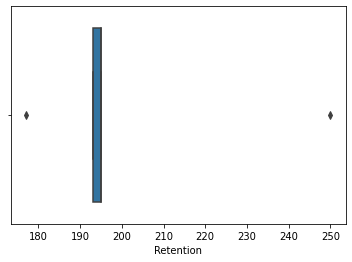

In [146]:
csdata_f2 = csdata_final[csdata_final['labels']==2]
csdata_final2 = csdata_f2.drop(['Customer ID','labels'],axis=1)
for i in csdata_final2.columns:
    sns.boxplot(csdata_final2[i])
    plt.show()

class 3

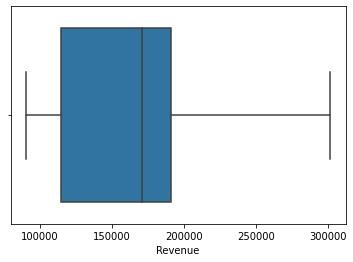

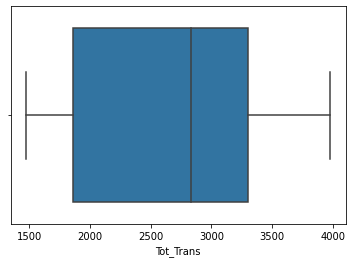

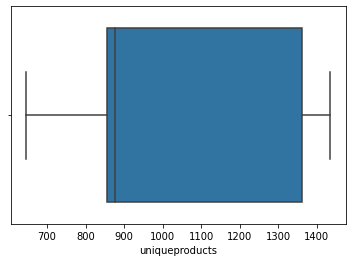

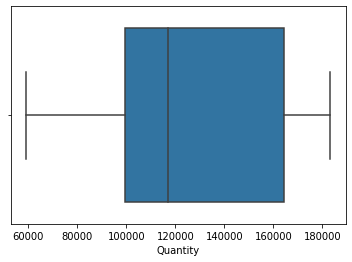

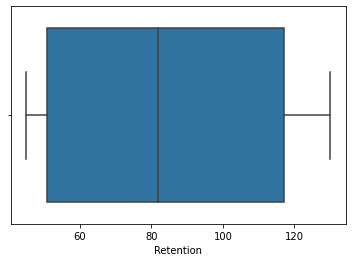

In [145]:
csdata_final[csdata_final['labels']==3]
csdata_f3 = csdata_final[csdata_final['labels']==3]
csdata_final3 = csdata_f3.drop(['Customer ID','labels'],axis=1)
for i in csdata_final3.columns:
    sns.boxplot(csdata_final3[i])
    plt.show()

class 4

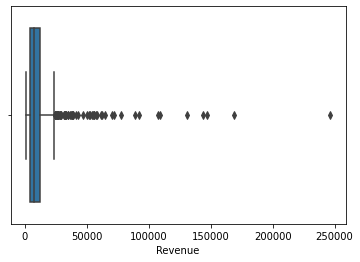

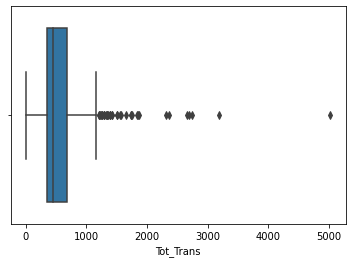

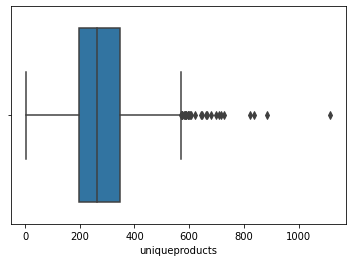

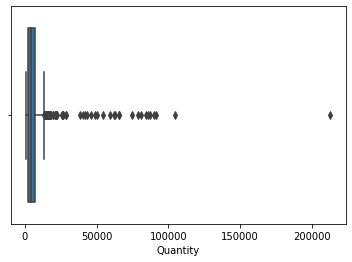

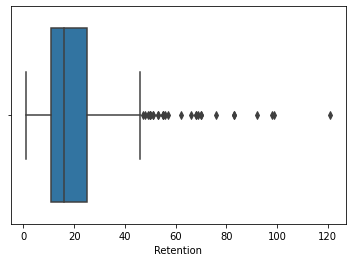

In [147]:
csdata_final[csdata_final['labels']==4]
csdata_f4 = csdata_final[csdata_final['labels']==4]
csdata_final4 = csdata_f4.drop(['Customer ID','labels'],axis=1)
for i in csdata_final4.columns:
    sns.boxplot(csdata_final4[i])
    plt.show()